## Import Data ##

In [20]:
import pandas as pd
import numpy as np
from scipy.stats import *

data = pd.read_csv("personalized_learning_dataset.csv")
df = data

In [22]:
import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [24]:
from sklearn.preprocessing import LabelEncoder

#Words to numbers
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Education_Level"] = le.fit_transform(df["Education_Level"])
df["Course_Name"] = le.fit_transform(df["Course_Name"])
df["Engagement_Level"] = le.fit_transform(df["Engagement_Level"])
df["Learning_Style"] = le.fit_transform(df["Learning_Style"])
df["Dropout_Likelihood"] = le.fit_transform(df["Dropout_Likelihood"])

In [26]:
df = df.drop(columns=["Student_ID"])

In [28]:
X = df.drop(columns=["Dropout_Likelihood"])
y = df["Dropout_Likelihood"]

In [30]:
df

Age  Gender  Education_Level  Course_Name  Time_Spent_on_Videos  \
0      15       0                0            2                   171   
1      49       1                2            3                   156   
2      20       0                2            3                   217   
3      37       0                2            1                   489   
4      34       0                1            3                   496   
...   ...     ...              ...          ...                   ...   
9995   26       0                2            2                   162   
9996   37       1                1            2                   447   
9997   40       0                1            2                   105   
9998   44       1                0            3                   245   
9999   39       0                2            2                   171   

      Quiz_Attempts  Quiz_Scores  Forum_Participation  \
0                 4           67                    2   
1                 4           64                    0   
2                 2           55                    2   
3                 1           65                   43   
4                 3           59                   34   
...             ...          ...                  ...   
9995              2           87                   27   
9996              2           39                   10   
9997              4           50                   23   
9998              2           84                   39   
9999              2           88                    8   

      Assignment_Completion_Rate  Engagement_Level  Final_Exam_Score  \
0                             89                 2                51   
1                             94                 2                92   
2                             67                 2                45   
3                             60                 0                59   
4                             88                 2                93   
...                          ...               ...               ...   
9995                          73                 2                68   
9996                          68                 2                46   
9997                          41                 0                64   
9998                          85                 2                38   
9999                          69                 2                97   

      Learning_Style  Feedback_Score  Dropout_Likelihood  
0                  3               1                   0  
1                  2               5                   0  
2                  2               1                   0  
3                  3               4                   0  
4                  3               3                   0  
...              ...             ...                 ...  
9995               1               2                   0  
9996               2               1                   1  
9997               3               1                   0  
9998               3               2                   0  
9999               3               2                   0  

[10000 rows x 14 columns]

## Data Clean Up ##

In [32]:
stats.zscore(df) #Find outliers

Age    Gender  Education_Level  Course_Name  Time_Spent_on_Videos  \
0    -1.703186 -0.962182        -1.399628     0.009643             -0.595664   
1     1.675816  0.778064         0.904856     0.718664             -0.701559   
2    -1.206274 -0.962182         0.904856     0.718664             -0.270918   
3     0.483227 -0.962182         0.904856    -0.699378              1.649317   
4     0.185080 -0.962182        -0.247386     0.718664              1.698735   
...        ...       ...              ...          ...                   ...   
9995 -0.609979 -0.962182         0.904856     0.009643             -0.659201   
9996  0.483227  0.778064        -0.247386     0.009643              1.352810   
9997  0.781374 -0.962182        -0.247386     0.009643             -1.061603   
9998  1.178904  0.778064        -1.399628     0.718664             -0.073247   
9999  0.681992 -0.962182         0.904856     0.009643             -0.595664   

      Quiz_Attempts  Quiz_Scores  Forum_Participation  \
0          1.335755     0.119351            -1.578287   
1          1.335755    -0.028519            -1.717858   
2         -0.445845    -0.472129            -1.578287   
3         -1.336646     0.020771             1.282926   
4          0.444955    -0.274969             0.654855   
...             ...          ...                  ...   
9995      -0.445845     1.105150             0.166355   
9996      -0.445845    -1.260768            -1.020001   
9997       1.335755    -0.718579            -0.112788   
9998      -0.445845     0.957280             1.003783   
9999      -0.445845     1.154440            -1.159573   

      Assignment_Completion_Rate  Engagement_Level  Final_Exam_Score  \
0                       1.120582          0.928154         -0.681598   
1                       1.408601          0.928154          1.358668   
2                      -0.146706          0.928154         -0.980174   
3                      -0.549934         -1.376960         -0.283498   
4                       1.062978          0.928154          1.408431   
...                          ...               ...               ...   
9995                    0.198918          0.928154          0.164366   
9996                   -0.089102          0.928154         -0.930411   
9997                   -1.644409         -1.376960         -0.034685   
9998                    0.890166          0.928154         -1.328512   
9999                   -0.031498          0.928154          1.607481   

      Learning_Style  Feedback_Score  Dropout_Likelihood  
0           1.330136       -1.415976           -0.493272  
1           0.435867        1.398246           -0.493272  
2           0.435867       -1.415976           -0.493272  
3           1.330136        0.694691           -0.493272  
4           1.330136       -0.008865           -0.493272  
...              ...             ...                 ...  
9995       -0.458402       -0.712420           -0.493272  
9996        0.435867       -1.415976            2.027279  
9997        1.330136       -1.415976           -0.493272  
9998        1.330136       -0.712420           -0.493272  
9999        1.330136       -0.712420           -0.493272  

[10000 rows x 14 columns]

In [34]:
#Drop outliers
z = np.abs(stats.zscore(df))
threshold_z = 3
outliers = np.where(z > threshold_z)[0]
df = df.drop(outliers)
df = df.reset_index(drop=True)
df.shape

(10000, 14)

In [36]:
df.isna().sum()

Age                           0
Gender                        0
Education_Level               0
Course_Name                   0
Time_Spent_on_Videos          0
Quiz_Attempts                 0
Quiz_Scores                   0
Forum_Participation           0
Assignment_Completion_Rate    0
Engagement_Level              0
Final_Exam_Score              0
Learning_Style                0
Feedback_Score                0
Dropout_Likelihood            0
dtype: int64

In [ ]:
df = df.dropna() #drop rows with missing values
df = df.reset_index(drop=True)

In [38]:
df.duplicated().sum()

0

In [ ]:
df = df.drop_duplicates() #drop duplicate rows
df = df.reset_index(drop=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

#Standardize data, helpful for linear regression and Neural Networks
object = StandardScaler()
df = pd.DataFrame(object.fit_transform(X))

In [40]:
X = df.drop(columns=["Dropout_Likelihood"])
y = df["Dropout_Likelihood"]
df

Age  Gender  Education_Level  Course_Name  Time_Spent_on_Videos  \
0      15       0                0            2                   171   
1      49       1                2            3                   156   
2      20       0                2            3                   217   
3      37       0                2            1                   489   
4      34       0                1            3                   496   
...   ...     ...              ...          ...                   ...   
9995   26       0                2            2                   162   
9996   37       1                1            2                   447   
9997   40       0                1            2                   105   
9998   44       1                0            3                   245   
9999   39       0                2            2                   171   

      Quiz_Attempts  Quiz_Scores  Forum_Participation  \
0                 4           67                    2   
1                 4           64                    0   
2                 2           55                    2   
3                 1           65                   43   
4                 3           59                   34   
...             ...          ...                  ...   
9995              2           87                   27   
9996              2           39                   10   
9997              4           50                   23   
9998              2           84                   39   
9999              2           88                    8   

      Assignment_Completion_Rate  Engagement_Level  Final_Exam_Score  \
0                             89                 2                51   
1                             94                 2                92   
2                             67                 2                45   
3                             60                 0                59   
4                             88                 2                93   
...                          ...               ...               ...   
9995                          73                 2                68   
9996                          68                 2                46   
9997                          41                 0                64   
9998                          85                 2                38   
9999                          69                 2                97   

      Learning_Style  Feedback_Score  Dropout_Likelihood  
0                  3               1                   0  
1                  2               5                   0  
2                  2               1                   0  
3                  3               4                   0  
4                  3               3                   0  
...              ...             ...                 ...  
9995               1               2                   0  
9996               2               1                   1  
9997               3               1                   0  
9998               3               2                   0  
9999               3               2                   0  

[10000 rows x 14 columns]

## Data Analysis ##

In [42]:
df.describe()

Age       Gender  Education_Level   Course_Name  \
count  10000.000000  10000.00000     10000.000000  10000.000000   
mean      32.137700      0.55290         1.214700      1.986400   
std       10.062647      0.57466         0.867917      1.410466   
min       15.000000      0.00000         0.000000      0.000000   
25%       24.000000      0.00000         0.000000      1.000000   
50%       32.000000      1.00000         2.000000      2.000000   
75%       41.000000      1.00000         2.000000      3.000000   
max       49.000000      2.00000         2.000000      4.000000   

       Time_Spent_on_Videos  Quiz_Attempts   Quiz_Scores  Forum_Participation  \
count          10000.000000   10000.000000  10000.000000         10000.000000   
mean             255.375400       2.500500     64.578600            24.616200   
std              141.656392       1.122642     20.289125            14.330305   
min               10.000000       1.000000     30.000000             0.000000   
25%              131.000000       1.000000     47.000000            12.000000   
50%              257.000000       3.000000     65.000000            25.000000   
75%              378.000000       4.000000     82.000000            37.000000   
max              499.000000       4.000000     99.000000            49.000000   

       Assignment_Completion_Rate  Engagement_Level  Final_Exam_Score  \
count                10000.000000      10000.000000      10000.000000   
mean                    69.546800          1.194700         64.697000   
std                     17.360782          0.867679         20.096417   
min                     40.000000          0.000000         30.000000   
25%                     54.000000          0.000000         47.000000   
50%                     69.000000          1.000000         65.000000   
75%                     85.000000          2.000000         82.000000   
max                     99.000000          2.000000         99.000000   

       Learning_Style  Feedback_Score  Dropout_Likelihood  
count    10000.000000    10000.000000        10000.000000  
mean         1.512600        3.012600            0.195700  
std          1.118287        1.421423            0.396758  
min          0.000000        1.000000            0.000000  
25%          1.000000        2.000000            0.000000  
50%          2.000000        3.000000            0.000000  
75%          3.000000        4.000000            0.000000  
max          3.000000        5.000000            1.000000

In [44]:
df.corr()

Age    Gender  Education_Level  Course_Name  \
Age                         1.000000  0.004543        -0.001187    -0.002144   
Gender                      0.004543  1.000000        -0.001419    -0.016757   
Education_Level            -0.001187 -0.001419         1.000000     0.009575   
Course_Name                -0.002144 -0.016757         0.009575     1.000000   
Time_Spent_on_Videos       -0.012768  0.005077        -0.001883     0.006251   
Quiz_Attempts               0.006550 -0.018023         0.009384     0.014657   
Quiz_Scores                -0.026188 -0.016770        -0.001592    -0.013410   
Forum_Participation         0.011031  0.009364         0.003787    -0.019357   
Assignment_Completion_Rate -0.012556 -0.015029        -0.011257     0.006818   
Engagement_Level            0.007204 -0.007120         0.009028    -0.005436   
Final_Exam_Score           -0.005315  0.001301         0.007079     0.006894   
Learning_Style             -0.025559  0.015537        -0.008712     0.010888   
Feedback_Score             -0.007484  0.001265        -0.000896    -0.004653   
Dropout_Likelihood         -0.012412  0.003498        -0.000920    -0.011864   

                            Time_Spent_on_Videos  Quiz_Attempts  Quiz_Scores  \
Age                                    -0.012768       0.006550    -0.026188   
Gender                                  0.005077      -0.018023    -0.016770   
Education_Level                        -0.001883       0.009384    -0.001592   
Course_Name                             0.006251       0.014657    -0.013410   
Time_Spent_on_Videos                    1.000000       0.003676     0.008773   
Quiz_Attempts                           0.003676       1.000000    -0.006037   
Quiz_Scores                             0.008773      -0.006037     1.000000   
Forum_Participation                     0.001473      -0.013633    -0.008869   
Assignment_Completion_Rate              0.015924      -0.002292     0.011785   
Engagement_Level                       -0.000881      -0.011753    -0.010303   
Final_Exam_Score                       -0.009718      -0.018079     0.004705   
Learning_Style                          0.012038      -0.008728     0.006061   
Feedback_Score                          0.012250       0.001124    -0.006006   
Dropout_Likelihood                      0.006551       0.002811     0.014631   

                            Forum_Participation  Assignment_Completion_Rate  \
Age                                    0.011031                   -0.012556   
Gender                                 0.009364                   -0.015029   
Education_Level                        0.003787                   -0.011257   
Course_Name                           -0.019357                    0.006818   
Time_Spent_on_Videos                   0.001473                    0.015924   
Quiz_Attempts                         -0.013633                   -0.002292   
Quiz_Scores                           -0.008869                    0.011785   
Forum_Participation                    1.000000                    0.008360   
Assignment_Completion_Rate             0.008360                    1.000000   
Engagement_Level                       0.009767                    0.008633   
Final_Exam_Score                      -0.006267                    0.014466   
Learning_Style                        -0.000366                    0.005657   
Feedback_Score                         0.003915                   -0.005292   
Dropout_Likelihood                    -0.013771                   -0.010063   

                            Engagement_Level  Final_Exam_Score  \
Age                                 0.007204         -0.005315   
Gender                             -0.007120          0.001301   
Education_Level                     0.009028          0.007079   
Course_Name                        -0.005436          0.006894   
Time_Spent_on_Videos               -0.000881         -0.009718   
Quiz_Attempts                      -0.011753     

In [46]:
kstest(X, "norm").pvalue #p-value for each row
#kstest(df[""], "norm").pvalue #p-value for each column

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

[Text(1, 0, 'Age'),
 Text(2, 0, 'Gender'),
 Text(3, 0, 'Education_Level'),
 Text(4, 0, 'Course_Name'),
 Text(5, 0, 'Time_Spent_on_Videos'),
 Text(6, 0, 'Quiz_Attempts'),
 Text(7, 0, 'Quiz_Scores'),
 Text(8, 0, 'Forum_Participation'),
 Text(9, 0, 'Assignment_Completion_Rate'),
 Text(10, 0, 'Engagement_Level'),
 Text(11, 0, 'Final_Exam_Score'),
 Text(12, 0, 'Learning_Style'),
 Text(13, 0, 'Feedback_Score')]

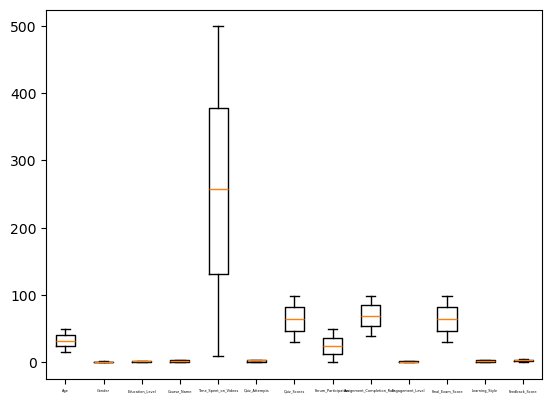

In [102]:
import matplotlib.pyplot as plt
import seaborn as sn

#When dealing with very large data-sets/working with others using graphs to see things would be beneficial to everyone's sanity
fig, ax = plt.subplots()
ax.boxplot(X)
ax.set_xticklabels(X.columns, size=2.5)

(array([[10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [  785.,  1070.,  1021.,   968.,  1012.,   986.,  1021.,  1082.,
          1054.,  1001.],
        [10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [ 2847.,  7153.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [ 1635.,  8365.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
             0.,     0.],
        [ 

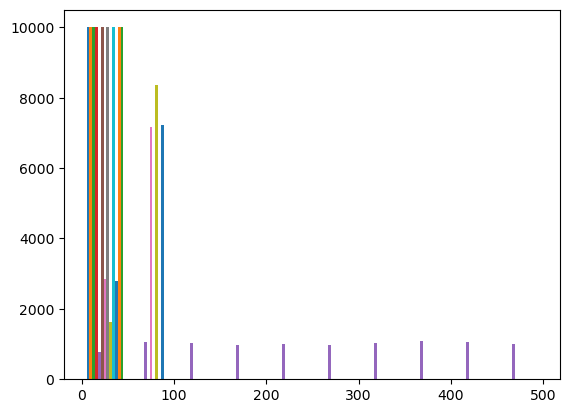

In [50]:
plt.hist(X)

array([[<Axes: xlabel='Age', ylabel='Age'>,
        <Axes: xlabel='Gender', ylabel='Age'>,
        <Axes: xlabel='Education_Level', ylabel='Age'>,
        <Axes: xlabel='Course_Name', ylabel='Age'>,
        <Axes: xlabel='Time_Spent_on_Videos', ylabel='Age'>,
        <Axes: xlabel='Quiz_Attempts', ylabel='Age'>,
        <Axes: xlabel='Quiz_Scores', ylabel='Age'>,
        <Axes: xlabel='Forum_Participation', ylabel='Age'>,
        <Axes: xlabel='Assignment_Completion_Rate', ylabel='Age'>,
        <Axes: xlabel='Engagement_Level', ylabel='Age'>,
        <Axes: xlabel='Final_Exam_Score', ylabel='Age'>,
        <Axes: xlabel='Learning_Style', ylabel='Age'>,
        <Axes: xlabel='Feedback_Score', ylabel='Age'>],
       [<Axes: xlabel='Age', ylabel='Gender'>,
        <Axes: xlabel='Gender', ylabel='Gender'>,
        <Axes: xlabel='Education_Level', ylabel='Gender'>,
        <Axes: xlabel='Course_Name', ylabel='Gender'>,
        <Axes: xlabel='Time_Spent_on_Videos', ylabel='Gender'>,
       

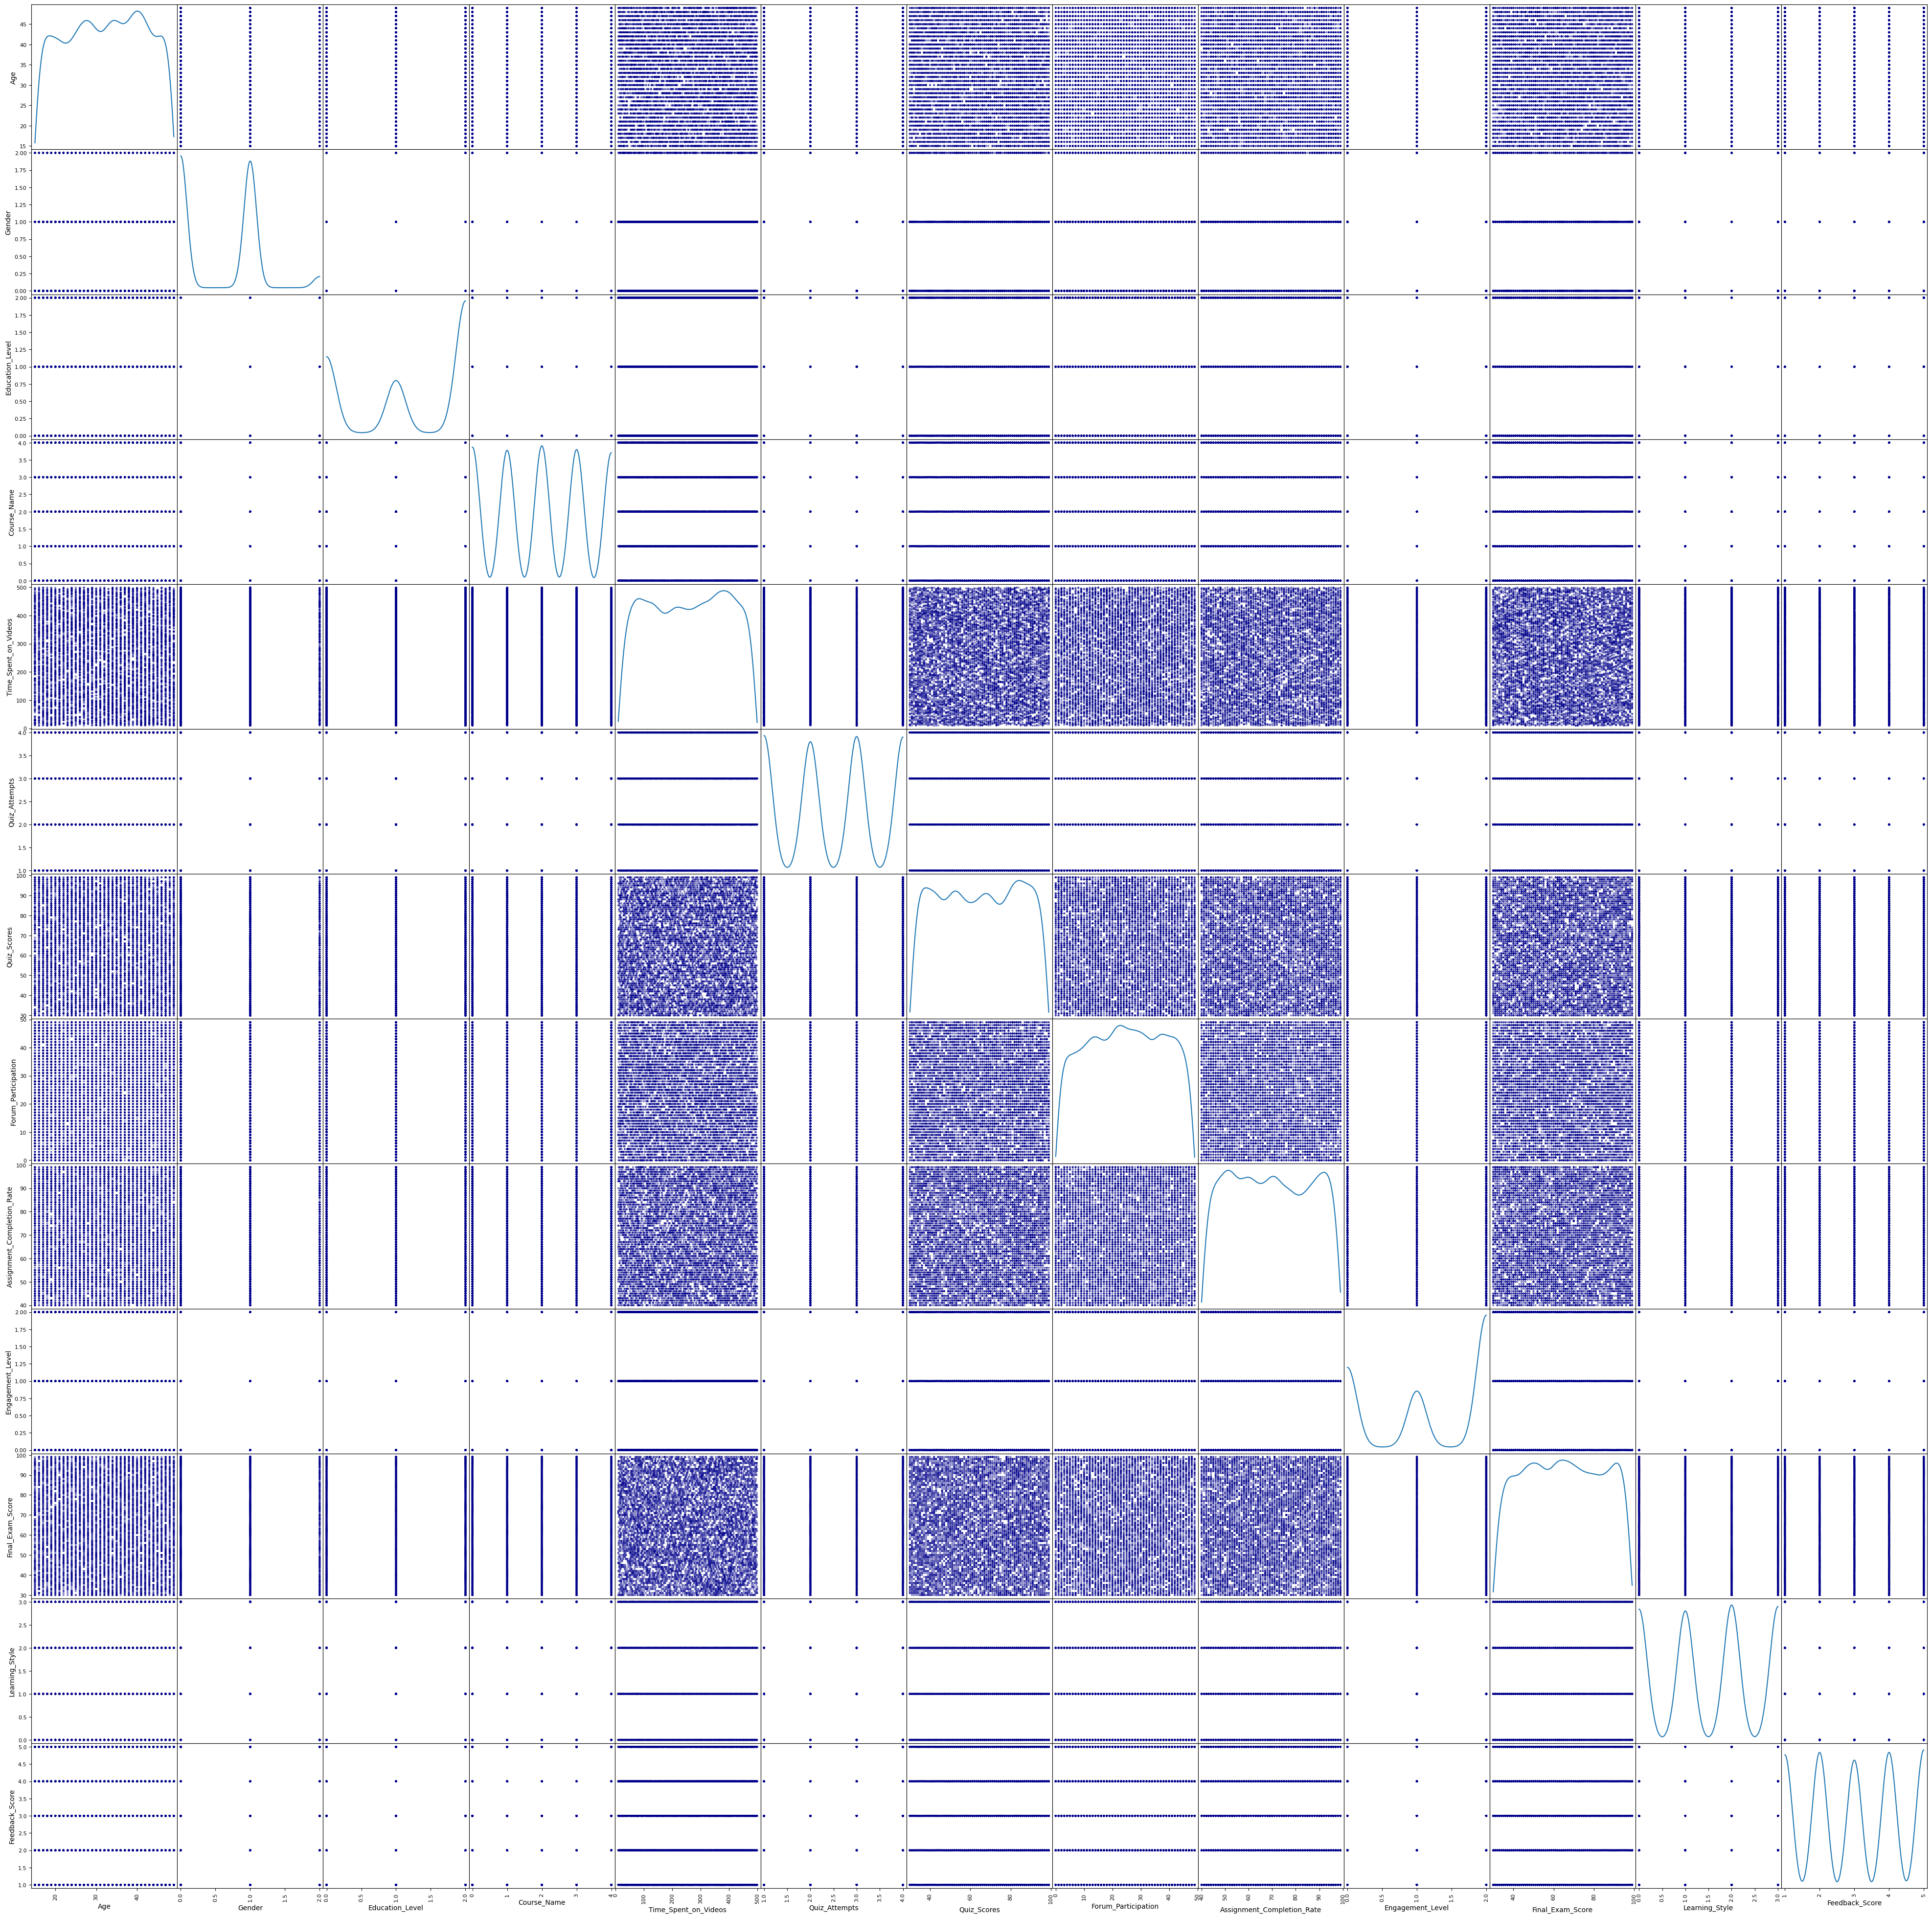

In [98]:
from pandas.plotting import scatter_matrix

scatter_matrix(X, alpha = 0.5, figsize = (50, 50), diagonal = "kde", c="#00008B")

## Fine-Tuning ##

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = RandomForestRegressor(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=2
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=1,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.1608   | 8.923     | 14.69     | 2.002     |
| 2         | -0.1604   | 6.744     | 3.788     | 3.662     |
| 3         | -0.1598   | 4.539     | 7.566     | 9.142     |
| 4         | -0.1619   | 11.24     | 8.965     | 14.33     |
| 5         | -0.1598   | 4.885     | 17.68     | 2.493     |
| 6         | -0.1624   | 13.74     | 8.929     | 12.06     |
| 7         | -0.1593   | 1.207     | 15.41     | 7.759     |
| 8         | -0.1593   | 1.105     | 19.86     | 17.02     |
| 9         | -0.1593   | 1.01      | 1.139     | 17.4      |
| 10        | -0.1593   | 1.082     | 9.692     | 19.72     |
| 11        | -0.1593   | 1.023     | 1.393     | 8.016     |
| 12        | -0.1593   | 1.046     | 10.18     | 2.307     |
| 13        | -0.1593   | 1.267     | 19.61     | 2.1       |
| 14        | -0.1593   | 1.051     | 7.621     | 13.2      |
| 15    

In [82]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

#Define the function to optimize using cross-validation
def dtree_cv(max_depth, min_samples_split, min_samples_leaf):
    #Define the model with the parameters to be optimized
    estimator = DecisionTreeClassifier(
        max_depth=int(max_depth),
        min_samples_split=int(min_samples_split),
        min_samples_leaf=int(min_samples_leaf),
        random_state=2
    )
    cval = cross_val_score(estimator, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    return cval.mean() #The optimizer tries to maximize the function, so we negate the score to minimize it

#Define the parameter bounds
param_bounds = {
    'max_depth': (1, 20),
    'min_samples_split': (2, 20),
    'min_samples_leaf': (1, 20)
}

optimizer = BayesianOptimization(
    f=dtree_cv,
    pbounds=param_bounds,
    random_state=1,
)

optimizer.maximize(n_iter=100, init_points=6) #Bayesian optimization
best_params_bayes = optimizer.max['params']
best_params_bayes['max_depth'] = int(best_params_bayes['max_depth'])
best_params_bayes['min_samples_split'] = int(best_params_bayes['min_samples_split'])
best_params_bayes['min_samples_leaf'] = int(best_params_bayes['min_samples_leaf'])
best_score_bayes = optimizer.max['target']

print(f"Best Parameters (Bayesian Optimization): {best_params_bayes}")
print(f"Best Score (Bayesian Optimization): {best_score_bayes}")

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | -0.2117   | 8.923     | 14.69     | 2.002     |
| 2         | -0.2111   | 6.744     | 3.788     | 3.662     |
| 3         | -0.2      | 4.539     | 7.566     | 9.142     |
| 4         | -0.2454   | 11.24     | 8.965     | 14.33     |
| 5         | -0.1994   | 4.885     | 17.68     | 2.493     |
| 6         | -0.2609   | 13.74     | 8.929     | 12.06     |
| 7         | -0.1983   | 1.023     | 10.57     | 3.624     |
| 8         | -0.1983   | 1.108     | 19.35     | 13.86     |
| 9         | -0.1983   | 1.01      | 1.139     | 17.4      |
| 10        | -0.1983   | 1.082     | 9.692     | 19.72     |
| 11        | -0.1983   | 1.023     | 1.393     | 8.016     |
| 12        | -0.1983   | 1.131     | 10.63     | 11.99     |
| 13        | -0.1994   | 4.615     | 19.62     | 19.99     |
| 14        | -0.1983   | 1.111     | 19.99     | 3.008     |
| 15    

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)
parameter = {'n_neighbors': np.arange(2, 30, 1)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid = parameter, cv = kf, verbose = 1)
knn_cv.fit(X_train, y_train)
print(knn_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 29}


## Training and Testing ##

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib

model1 = RandomForestClassifier(max_depth = 1, min_samples_leaf = 10, min_samples_split = 2).fit(X_train, y_train)
#model1 = RandomForestClassifier(n_estimators = 100, random_state=42).fit(X_train, y_train)

predictions = model1.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model1, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.8103333333333333


In [86]:
from sklearn.tree import DecisionTreeClassifier
import joblib

model2 = DecisionTreeClassifier(max_depth = 2, min_samples_leaf = 4, min_samples_split = 9).fit(X_train, y_train)

predictions = model2.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model2, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.8103333333333333


In [70]:
from sklearn.neighbors import KNeighborsClassifier
import joblib

model3 = KNeighborsClassifier(n_neighbors=29).fit(X_train, y_train)

score = model3.score(X_test, y_test)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model3, ".joblib")
    model = joblib.load(".joblib")

Accuracy: 0.8103333333333333


In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
import joblib

linreg = LinearRegression()

param_space = {'copy_X': [True,False], 'fit_intercept': [True,False], 
               'n_jobs': [1,5,10,15,None], 'positive': [True,False]}

model4 = GridSearchCV(linreg, param_space, cv=10).fit(X_train, y_train)

predictions = np.array(model4.predict(X_test))
score = model4.score(X_test, y_test)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model4, ".joblib")
    model = joblib.load(".joblib")

Accuracy: -0.0005624350036890213


In [104]:
from sklearn import svm
import joblib

model5 = svm.SVC().fit(X_train, y_train)

predictions = model5.predict(X_test)
score = accuracy_score(y_test, predictions)
print(f"Accuracy: {score}")

#Save Model
if score >= 0.8:
    joblib.dump(model5, "Dropout.joblib")
    model = joblib.load("Dropout.joblib")

Accuracy: 0.8103333333333333


## Predicted vs Actual ##

In [106]:
y_predicted = model.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[2431,    0],
       [ 569,    0]])

Text(95.72222222222221, 0.5, 'Actual')

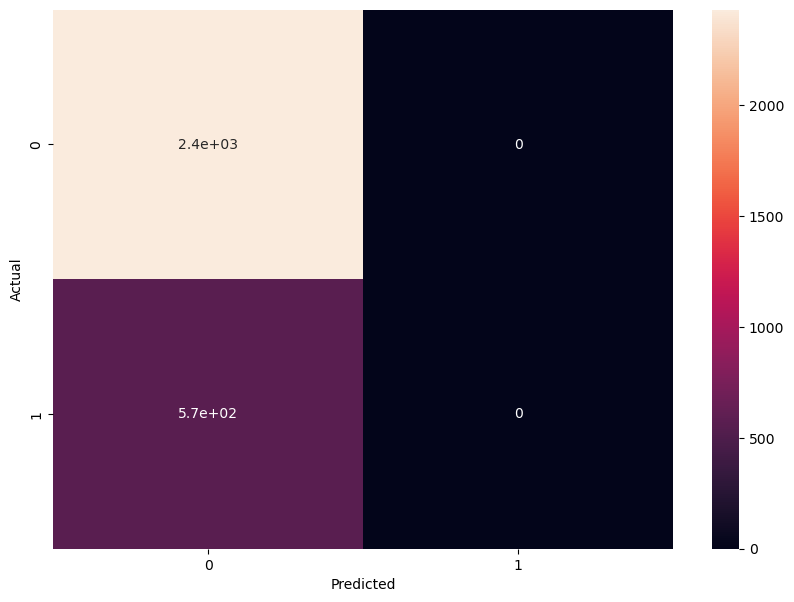

In [137]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")